In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
data = 'data/penguins.csv'
df = pd.read_csv(data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
df["bill_length_mm"] = df["bill_length_mm"].fillna(value = df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(value = df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())
df.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [5]:
X = df.drop(['sex', 'species', 'island'], axis = 1)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000
340,43.50000,18.10000,202.000000,3400.000000
341,49.60000,18.20000,193.000000,3775.000000
342,50.80000,19.00000,210.000000,4100.000000


In [6]:
scaler = MinMaxScaler()
X[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(X[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [7]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.429888,0.482282,0.490088,0.417154
4,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111
340,0.414545,0.595238,0.508475,0.194444
341,0.636364,0.607143,0.355932,0.298611
342,0.680000,0.702381,0.644068,0.388889


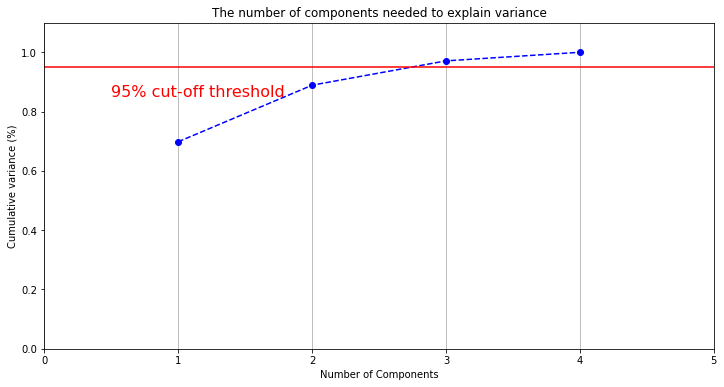

In [8]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [11]:
from pca import pca

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


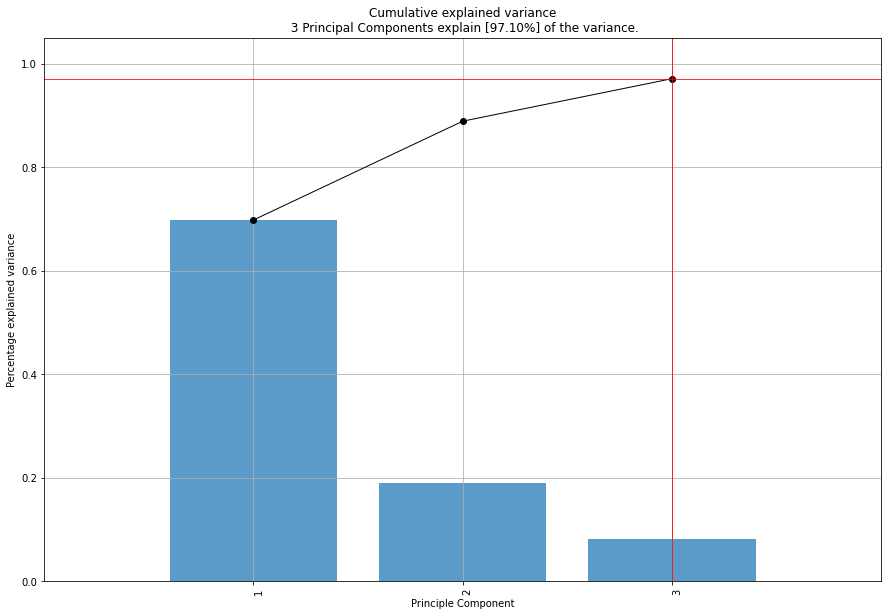

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 864x432 with 0 Axes>

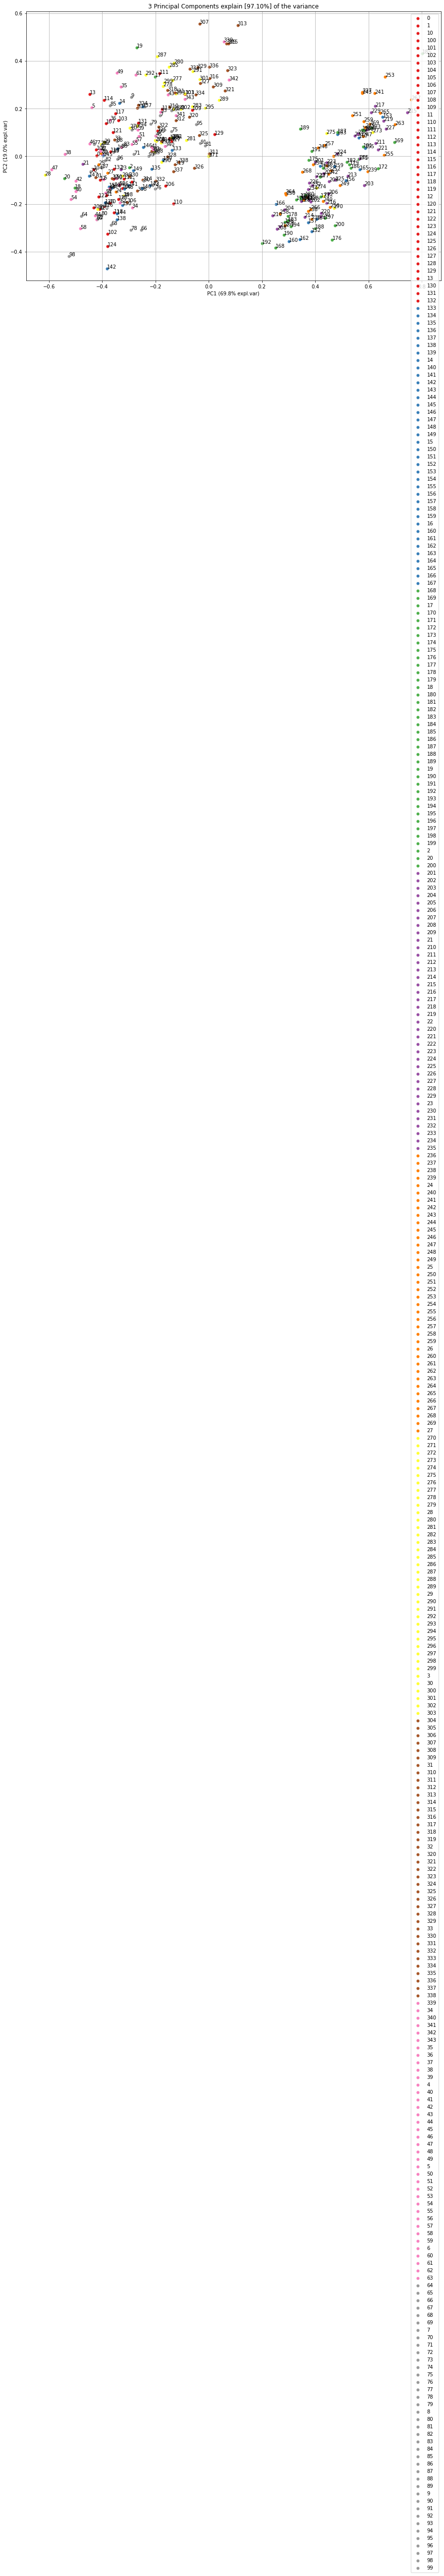

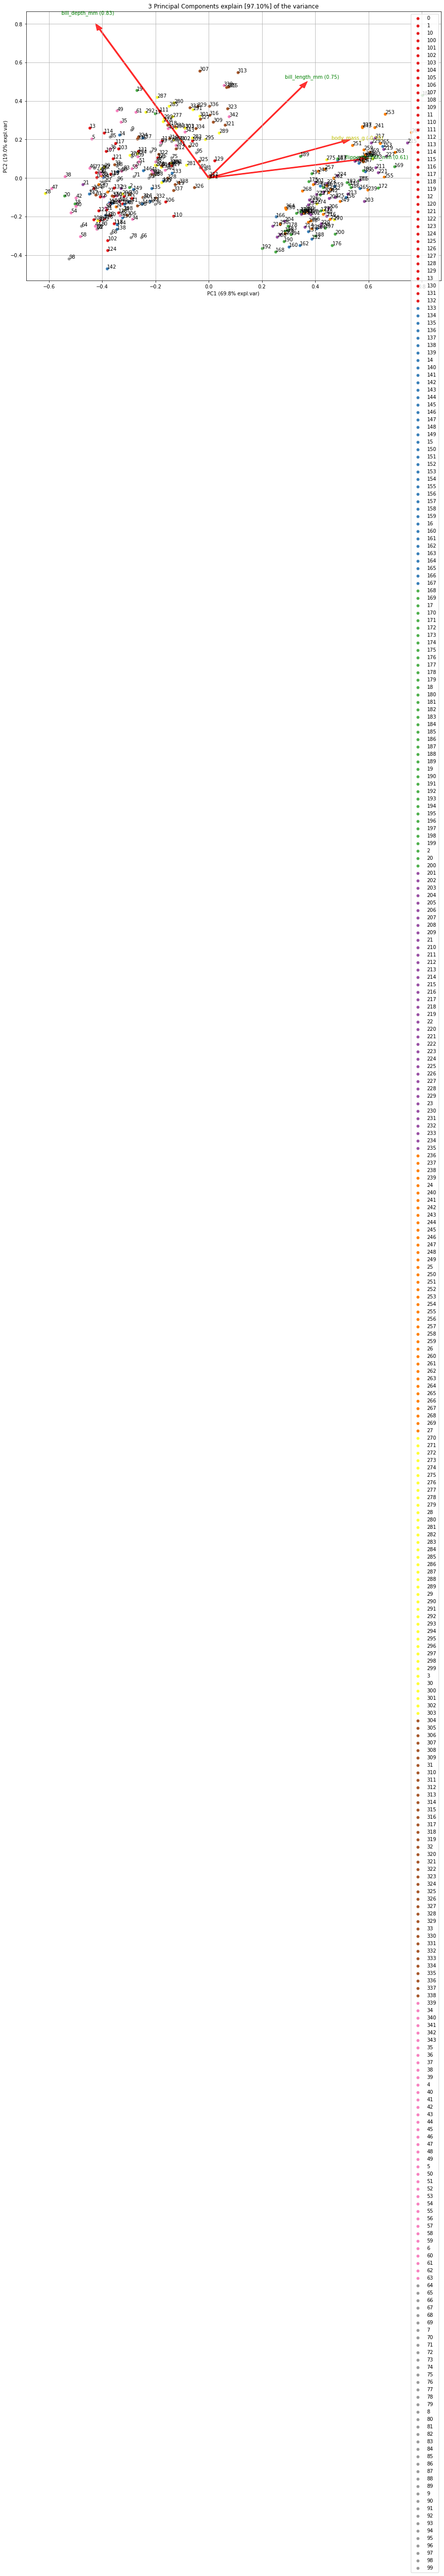

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


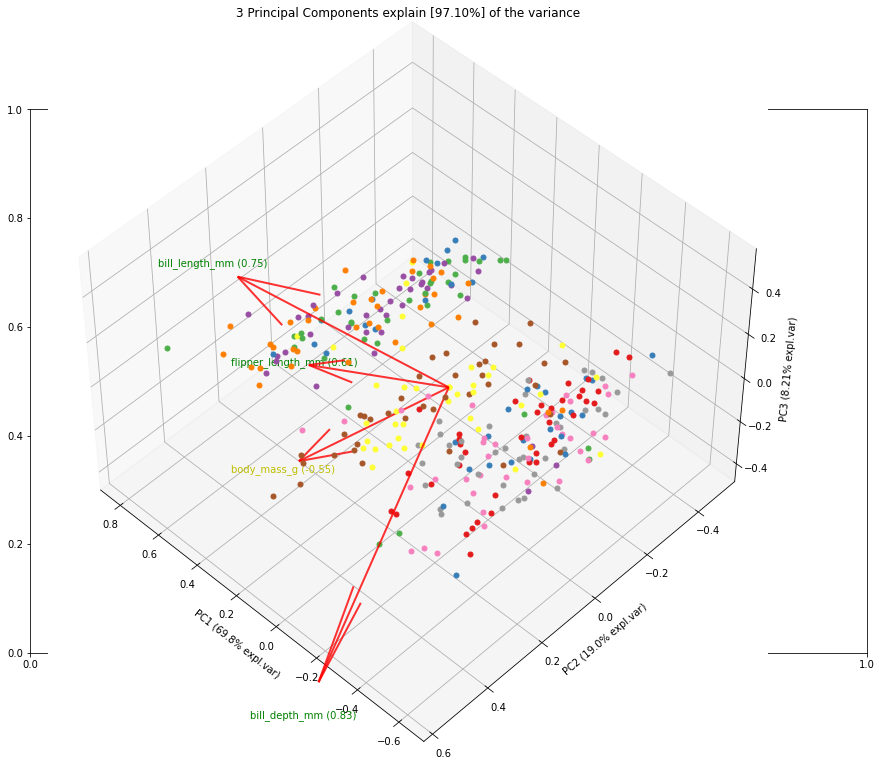

(<Figure size 1080x720 with 2 Axes>,
 <Axes3D:title={'center':'3 Principal Components explain [97.10%] of the variance'}, xlabel='PC1 (69.8% expl.var)', ylabel='PC2 (19.0% expl.var)'>)

In [12]:
# Or reduce the data towards 2 PCs
model = pca(n_components=3)

# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=10)
model.biplot3d(n_feat=10, legend=False)

In [13]:
results

{'loadings':      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
 PC1        0.376339      -0.439995           0.610781     0.540111
 PC2        0.509652       0.829556           0.103840     0.203245
 PC3        0.753868      -0.304108          -0.199814    -0.547061,
 'PC':               PC1           PC2           PC3
 0   -4.210603e-01  3.037969e-03 -5.216258e-02
 1   -2.882292e-01 -1.063097e-01 -1.866437e-02
 2   -2.980564e-01 -4.744080e-02  3.464301e-02
 3    2.288689e-16  1.000061e-15  2.671010e-16
 4   -4.061154e-01  2.199611e-02 -1.347284e-01
 ..            ...           ...           ...
 339  5.652721e-02  4.810425e-01  2.397732e-01
 340 -1.645321e-01  4.252841e-02  7.224453e-02
 341 -1.231996e-01  1.707856e-01  2.093404e-01
 342  7.606589e-02  3.202988e-01  1.063128e-01
 343 -8.941763e-02  2.400836e-01  1.907534e-01
 
 [344 rows x 3 columns],
 'explained_var': array([0.6981354 , 0.8889711 , 0.97107196]),
 'variance_ratio': array([0.6981354 , 0.19083569, 0.082

In [14]:
print(model.results['explained_var'])

[0.6981354  0.8889711  0.97107196]


In [15]:
print(model.results['variance_ratio'])

[0.6981354  0.19083569 0.08210086]


In [16]:
print(model.results['topfeat'])

    PC            feature   loading  type
0  PC1  flipper_length_mm  0.610781  best
1  PC2      bill_depth_mm  0.829556  best
2  PC3     bill_length_mm  0.753868  best
3  PC3        body_mass_g -0.547061  weak


In [17]:
print(model.results['loadings'])

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
PC1        0.376339      -0.439995           0.610781     0.540111
PC2        0.509652       0.829556           0.103840     0.203245
PC3        0.753868      -0.304108          -0.199814    -0.547061


In [18]:
dataset=model.results['PC']

In [19]:
dataset

,PC1,PC2,PC3
0,-4.210603e-01,3.037969e-03,-5.216258e-02
1,-2.882292e-01,-1.063097e-01,-1.866437e-02
2,-2.980564e-01,-4.744080e-02,3.464301e-02
3,2.288689e-16,1.000061e-15,2.671010e-16
4,-4.061154e-01,2.199611e-02,-1.347284e-01
...,...,...,...
339,5.652721e-02,4.810425e-01,2.397732e-01
340,-1.645321e-01,4.252841e-02,7.224453e-02
341,-1.231996e-01,1.707856e-01,2.093404e-01
342,7.606589e-02,3.202988e-01,1.063128e-01


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


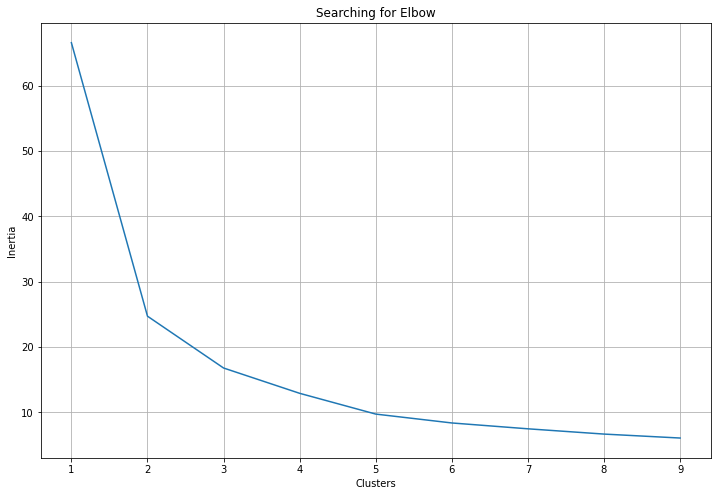

In [20]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(dataset)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5686422678228624
For n_clusters = 3 The average silhouette_score is : 0.4595547402567615
For n_clusters = 4 The average silhouette_score is : 0.41260536807086895
For n_clusters = 5 The average silhouette_score is : 0.40423296504618583


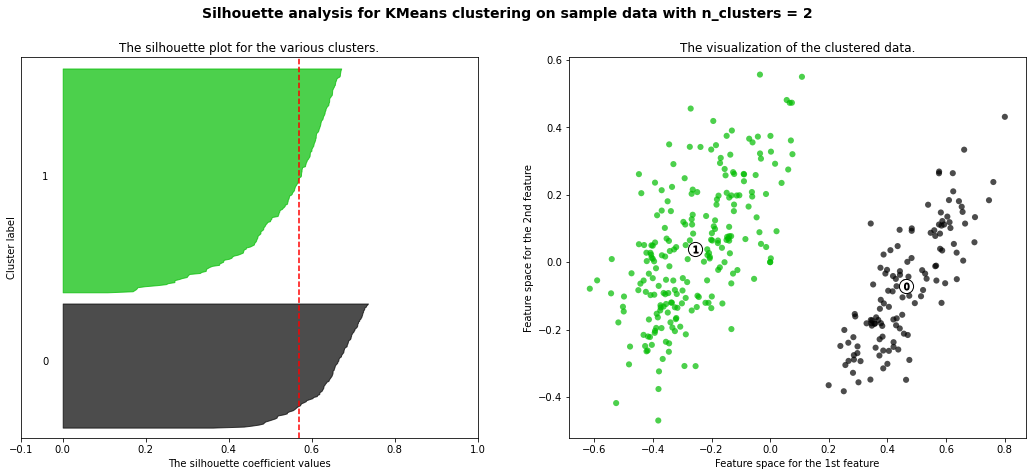

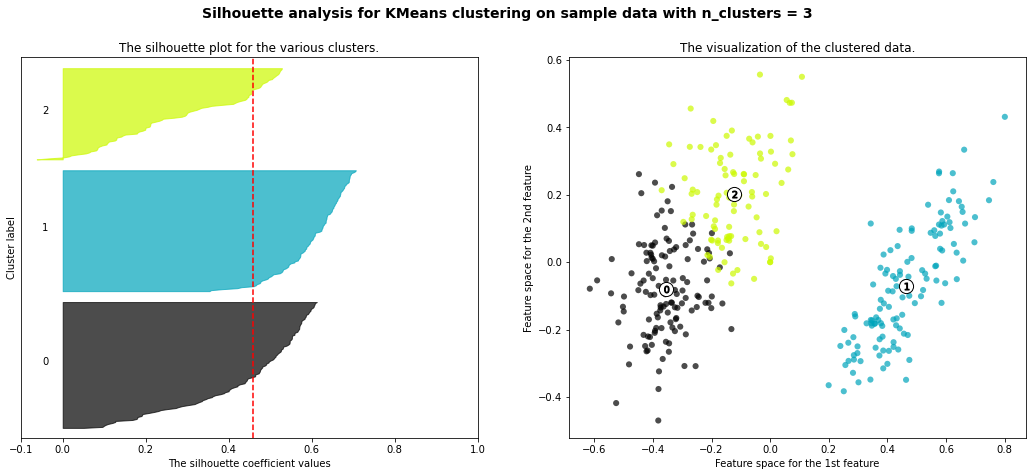

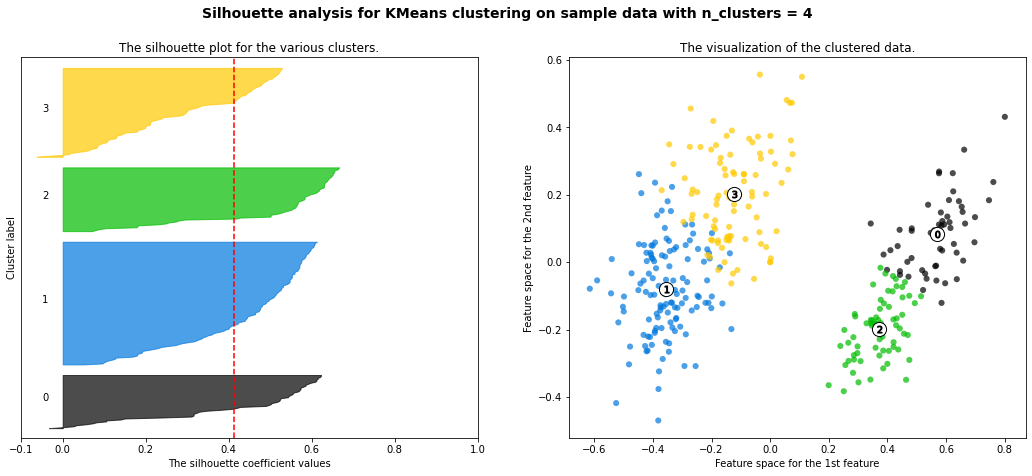

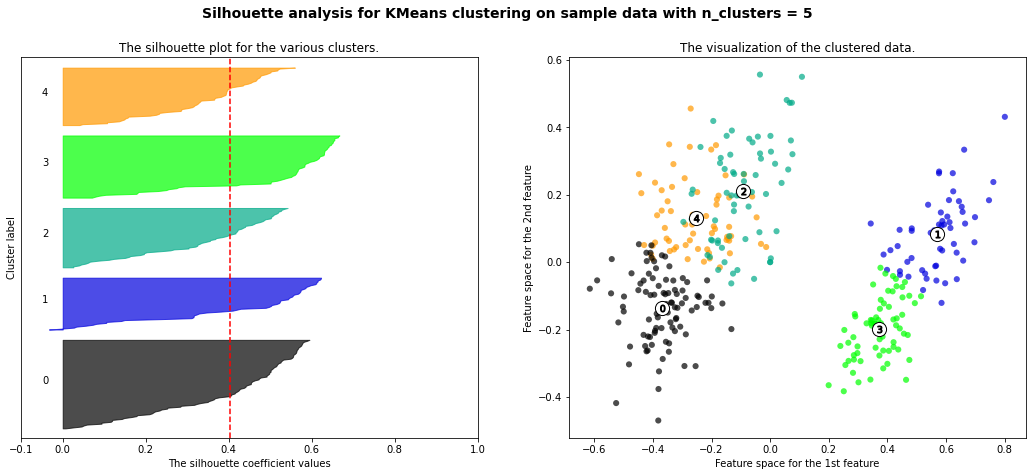

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dataset['PC1'], dataset['PC2'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [22]:
km = KMeans(n_clusters= 2, random_state=10, max_iter = 600, tol = 1)

In [23]:
model = km.fit(dataset)

In [24]:
cluster_labels = model.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
dataset['labels'] = cluster_labels
dataset

,PC1,PC2,PC3,labels
0,-4.210603e-01,3.037969e-03,-5.216258e-02,1
1,-2.882292e-01,-1.063097e-01,-1.866437e-02,1
2,-2.980564e-01,-4.744080e-02,3.464301e-02,1
3,2.288689e-16,1.000061e-15,2.671010e-16,1
4,-4.061154e-01,2.199611e-02,-1.347284e-01,1
...,...,...,...,...
339,5.652721e-02,4.810425e-01,2.397732e-01,1
340,-1.645321e-01,4.252841e-02,7.224453e-02,1
341,-1.231996e-01,1.707856e-01,2.093404e-01,1
342,7.606589e-02,3.202988e-01,1.063128e-01,1


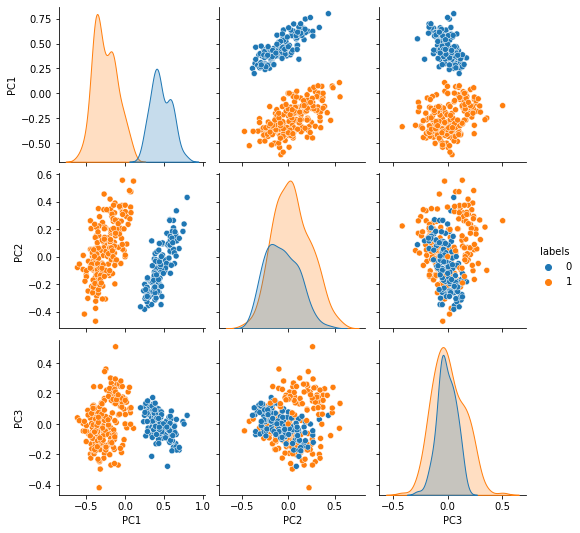

In [26]:
sns.pairplot(dataset, hue = 'labels')
plt.show()

In [27]:
dataset = dataset. drop(['labels'], axis = 1)

For n_components = 2 The average silhouette_score is : 0.5686422678228624
For n_components = 3 The average silhouette_score is : 0.4563089768724753
For n_components = 4 The average silhouette_score is : 0.44744908799021
For n_components = 5 The average silhouette_score is : 0.401325119205473


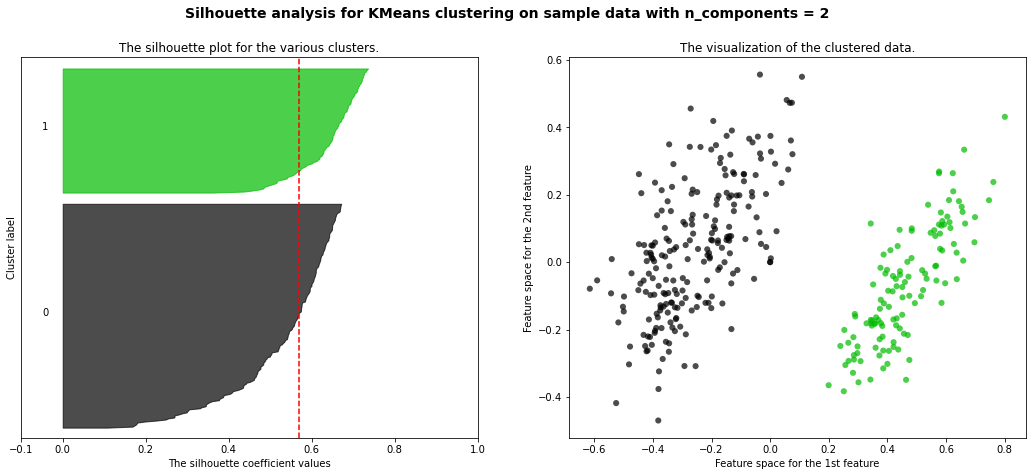

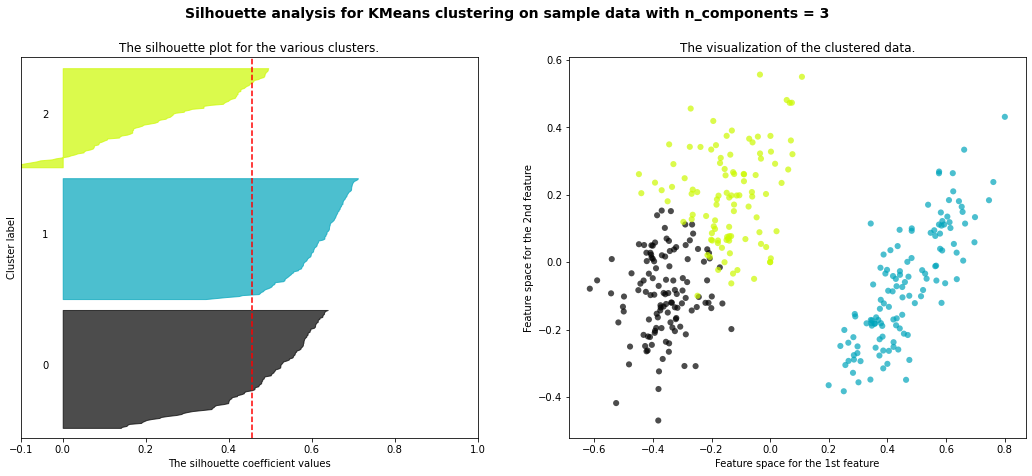

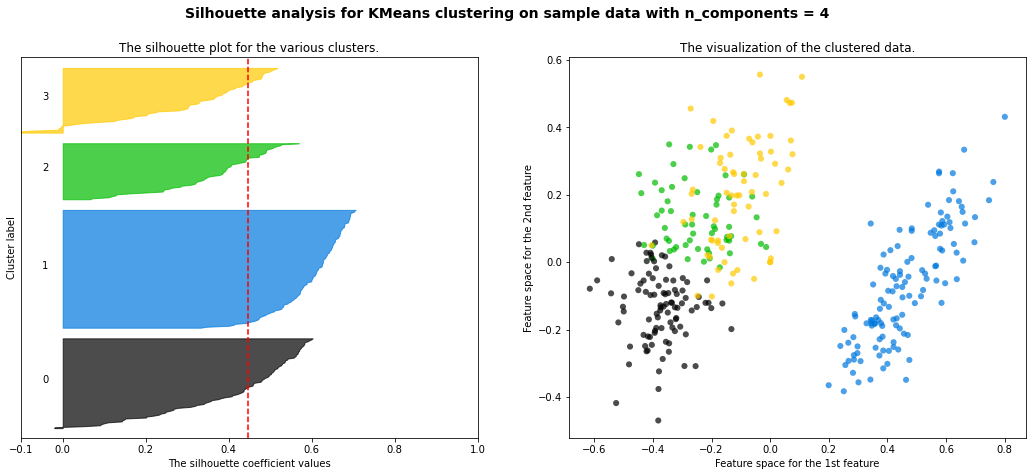

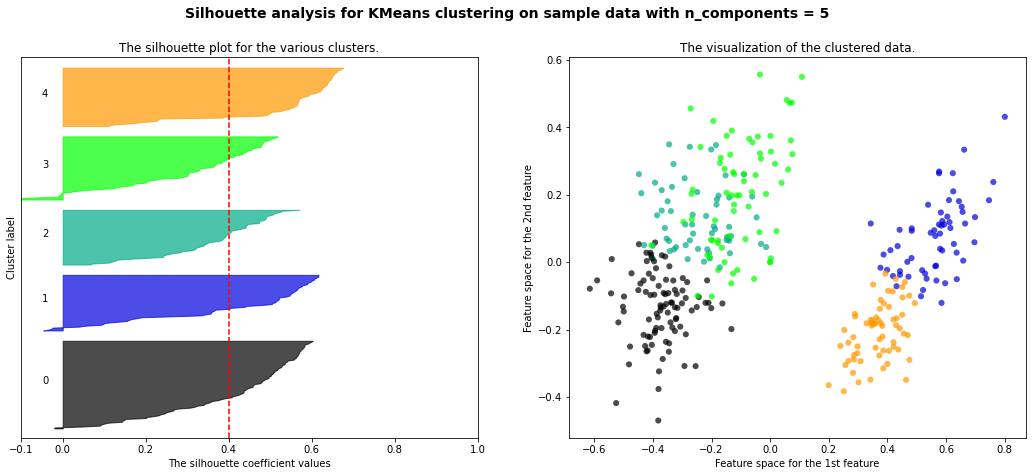

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import mixture


range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='spherical', max_iter = 600, tol = 1, random_state = 4
        )
    cluster_labels = gmm.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        dataset['PC1'], dataset['PC2'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_components = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [31]:
    gmm = mixture.GaussianMixture(
    n_components=2, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )

In [32]:
model = gmm.fit(dataset)

In [33]:
labels = gmm.predict(dataset)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
    dataset['labels'] = labels
    dataset

,PC1,PC2,PC3,labels
0,-4.210603e-01,3.037969e-03,-5.216258e-02,0
1,-2.882292e-01,-1.063097e-01,-1.866437e-02,0
2,-2.980564e-01,-4.744080e-02,3.464301e-02,0
3,2.288689e-16,1.000061e-15,2.671010e-16,0
4,-4.061154e-01,2.199611e-02,-1.347284e-01,0
...,...,...,...,...
339,5.652721e-02,4.810425e-01,2.397732e-01,0
340,-1.645321e-01,4.252841e-02,7.224453e-02,0
341,-1.231996e-01,1.707856e-01,2.093404e-01,0
342,7.606589e-02,3.202988e-01,1.063128e-01,0


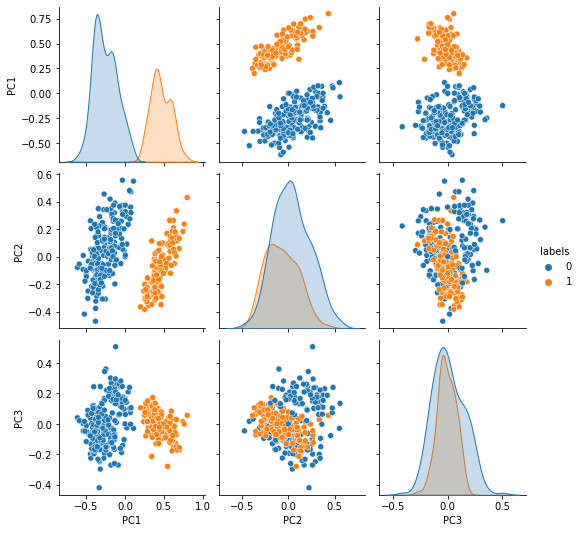

In [35]:
sns.pairplot(dataset, hue = 'labels')
plt.show()